<a href="https://colab.research.google.com/github/GuillermoBelda/MachineLearning/blob/main/PrimeraRedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [325]:
#Autor: Graduando Guillermo José Belda García
#Compañía:Universidad Politécnica de Cartagena
#Aquí simplemente se incluyen librerías
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

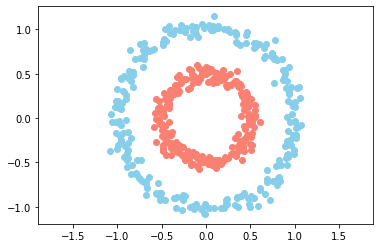

In [333]:
# CREAR EL DATASET

n = 500 #Numero de datos
p = 2 #Numero de características de cada dato


X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05) #Los puntos son comas, factor

Y = Y[:, np.newaxis]                                                       #es la distancia entre puntos
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1],c="skyblue")            #Plot 2D de los puntos a clasificar
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1],c="salmon")
plt.axis("equal")
plt.show()



In [327]:
#CLASE DE LA CAPA DE LA RED

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f): #Numero de conexiones, numero de neuronas, 

      self.act_f = act_f
      self.b = np.random.rand(1, n_neur)  *2 - 1 #Activando la funcion de activación Es un vector columna, de ahí el 1 La arimétcia es para que esté entorno a la media 1                                         
      self.w = np.random.rand(n_conn, n_neur) *2 - 1 #Entre paréntesis la dimensión de la matriz

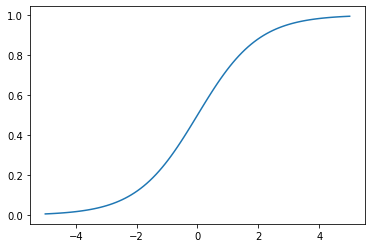

In [328]:
#FUNCIONES DE ACTIVACION

sigm = (lambda x: 1/ (1 + np.e **(-x)), #Un par de funciones dentro de sigm, con 
        lambda x: x * (1 -x))           #indices jugamos con cada funcion. Son funciones de activación clásicas


relu = lambda x: np.maximum(0,x)        #Funcion definida entre 0 y x  #Esta en realidad no la usamos


_x = np.linspace(-5, 5 ,100) #Variable que va desde -5 a 5 en 100 saltos

plt.plot(_x, sigm[0](_x))       #Mostrar en pantalla la sigmoide

In [329]:
#FORMA MANUAL DE INTRODUCIR CAPAS DE NEURONAS

#l0 = neural_layer(p, 4, sigm)
#l1 = neural_layer(4, 8, sigm)


In [330]:
#Codigo para crear la red neuronal (funcion con bucle for que va rellenando)


def create_nn(topology, act_f):                   #Creamos el creador de redes()

    nn = []

    for l, layer in enumerate(topology[: -1]):    #Bucle for para recorrer las distintas capas
                                                  #'l' es la variable que se recorre
      nn.append(neural_layer(topology[l], topology[l + 1], act_f))  #La función append incluye un dato al final de un array

    return nn


    


  

In [331]:
topology = [p, 4, 8, 1]  #variable(numero de neuronas en cada capa)

neural_net = create_nn(topology, sigm)                                      #Creamos una red neuronal

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),                          #Método de regresión de mínimos cuadrados(error)
           lambda Yp, Yr: (Yp - Yr))
                                                                            #Funciones con dos variables(Yp, Yr) que calcula el error cuadrático medio y su derivada


def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):                   #Definimos la función entrenamiento que va cambiando las sumas ponderadas

    # Forward pass
    #A partir de aquí el código se complica bastante
    
    out = [(None, X)]

    for l, layer in enumerate(neural_net):
      z = out[-1][1] @ neural_net[l].w + neural_net[l].b
      a = neural_net[l].act_f[0](z)
      out.append((z, a)) 

   

    if train: 

      #Backward pass
      deltas = []

      for l in reversed(range(0, len(neural_net))):

        z = out[l+1][0]
        a = out[l+1][1]

        
          #Aquí hay que tener en cuenta unos gradientes porque estamos en la última capa(Salida)
        if l == len(neural_net) - 1:
          deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) #Calcular delta última capa.   
          #Los graduentes a continuación son distintos por estar en capas ocultas
        else:
          deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))

          #Calcular delta respecto a capa previa
        _w = neural_net[l].w

        #Gradient descent
        
        neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
        
        neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr
       
        
    return out[-1][1]
    
train(neural_net, X, Y, l2_cost, 0.5)
print("")

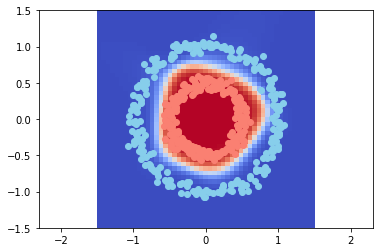

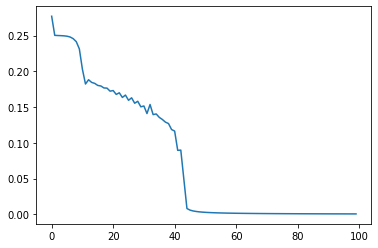

In [334]:
 #Todo este bloque de código es el ejecutable para el entrenamiento y la predicción

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
  #Entrenemos la red:
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0:

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res,res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1],c="skyblue")
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1],c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)

    